In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [24]:
df = pd.read_csv('MBTA_2023_System-Wide_Passenger_Survey_Data.csv')

In [32]:
data = df[df['measure']=='Race']

In [33]:
data.head()

,aggregation_level,service_mode,reporting_group,measure_group,measure,category,weighted_percent,ObjectId
21,Reporting Group,Bus,104,Race and Ethnicity,Race,American Indian or Alaska Native,0.056090,22
22,Reporting Group,Bus,104,Race and Ethnicity,Race,Asian,0.174333,23
23,Reporting Group,Bus,104,Race and Ethnicity,Race,Black or African American,0.264286,24
24,Reporting Group,Bus,104,Race and Ethnicity,Race,Middle Eastern or North African,0.047634,25
25,Reporting Group,Bus,104,Race and Ethnicity,Race,Native Hawaiian or other Pacific Islander,0.009066,26


In [35]:
data.to_csv('race_by_bus.csv', index=False)

In [36]:
bus_ids = data['reporting_group'].unique()

In [38]:
bus_ids

array(['104', '1', '11', '10', '111', '21', '16', '114, 116, & 117', '15',
       '23', '34 & 34E', '22', '32', '28 & 29', '47', '43 & SL5', '39',
       '4 & 7', '57', '66', '61 & 70', '67 & 77', '71', '73',
       'Brighton/Allston/Watertown - Boston', '9', '86', '8, 55 & CT3',
       'Cambridge/Arlington - Harvard', 'Cambridge/Arlington - Alewife',
       'Brighton/Allston/Watertown - Other Suburb',
       'Chelsea/East Boston/Lynn/Revere - North Shore',
       'Chelsea/East Boston/Lynn/Revere - Core', 'Malden/Everett - North',
       'Quincy - East', 'Jamaica Plain/Roslindale/Hyde Park',
       'Malden/Everett - South', 'SL4',
       'Roxbury/Dorchester/Mattapan/South End - East', 'Quincy - West',
       'Roxbury/Dorchester/Mattapan/South End - West',
       'Roxbury/Dorchester/Mattapan/South End & Jamaica Plain/Roslindale/Hyde Park',
       'Somerville/Medford/Charlestown - East',
       'Somerville/Medford/Charlestown - West', 'SL3', 'SL2', 'SL1',
       'All Silver Line BRT', 'A

In [55]:
important_routes = [ '22', '29', '15', '45', '44', '42', '17', '23', '31', '26', '111', '24', '33', '14']

In [59]:
len(important_routes), rows

(14, 3)

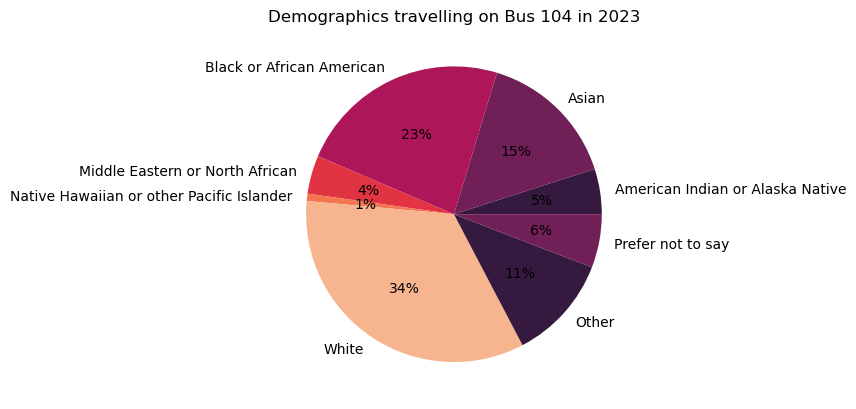

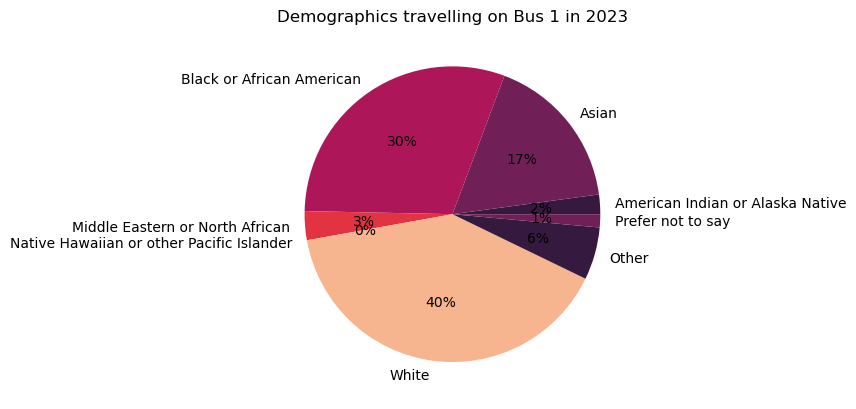

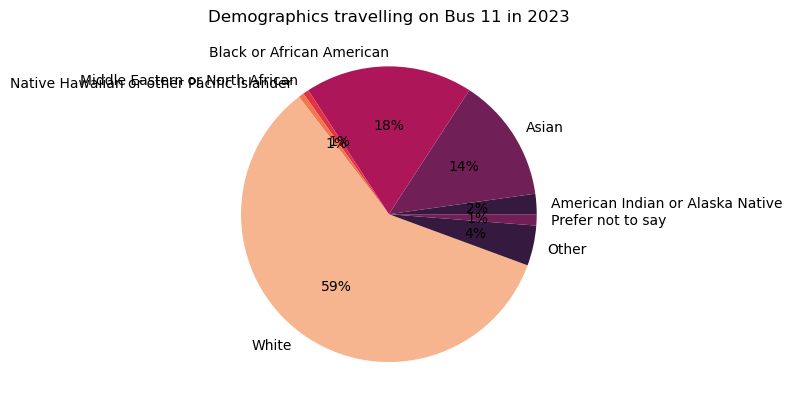

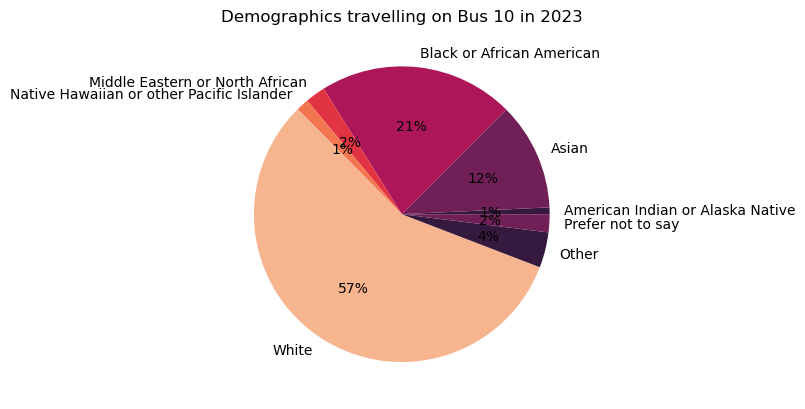

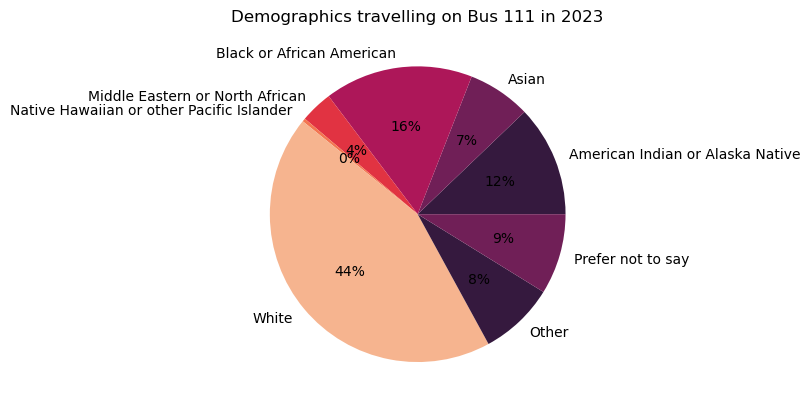

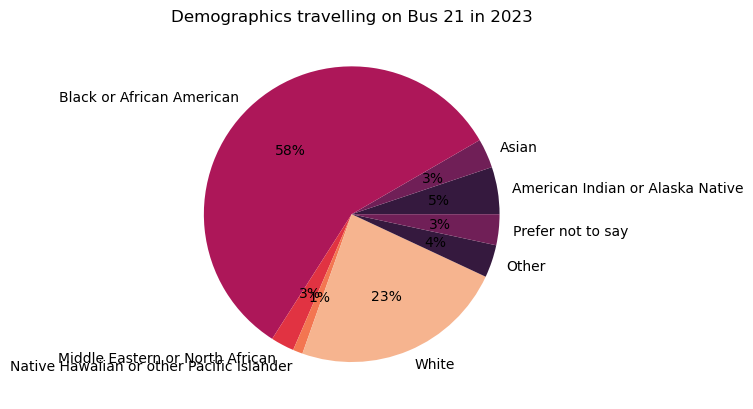

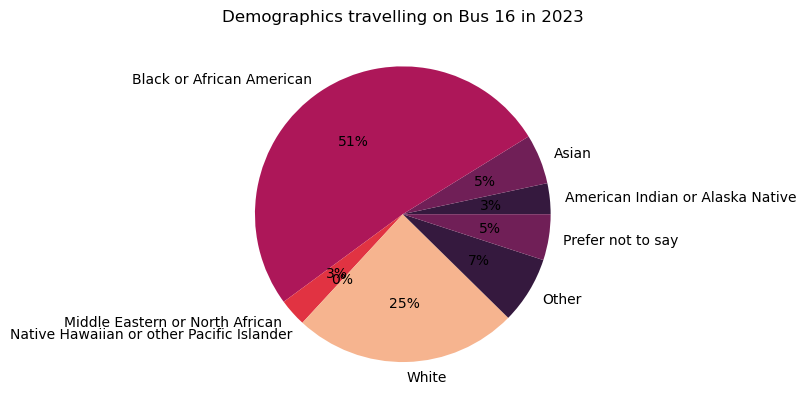

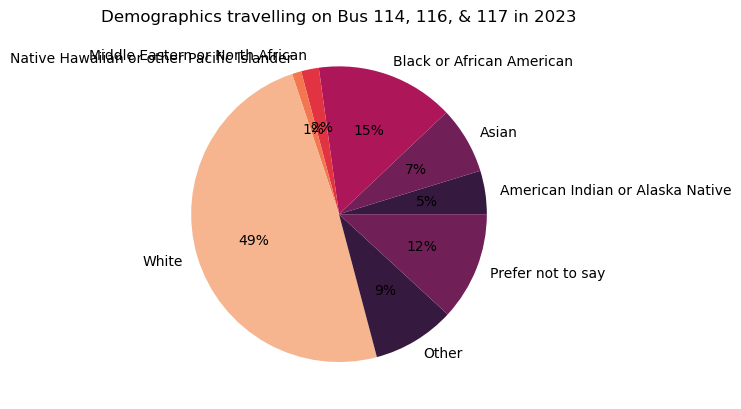

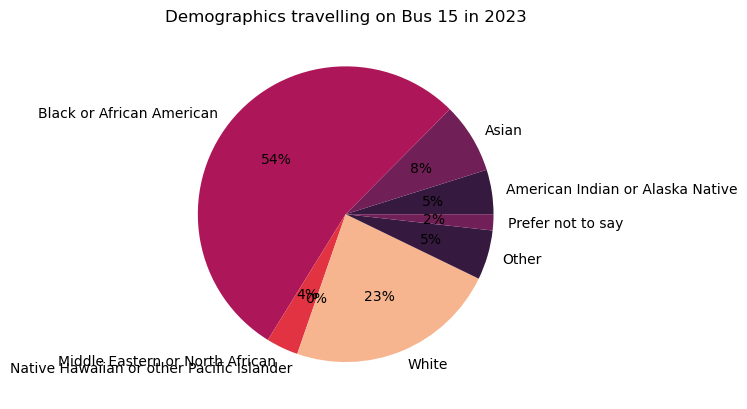

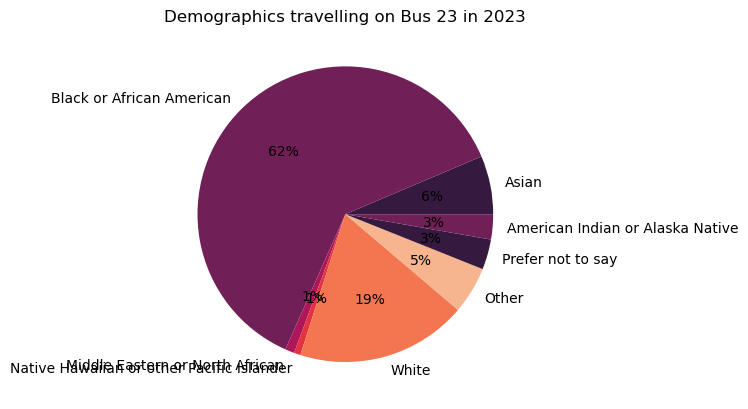

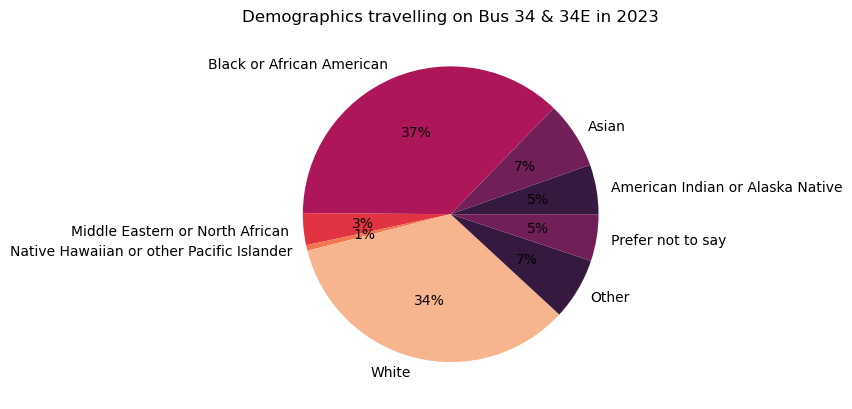

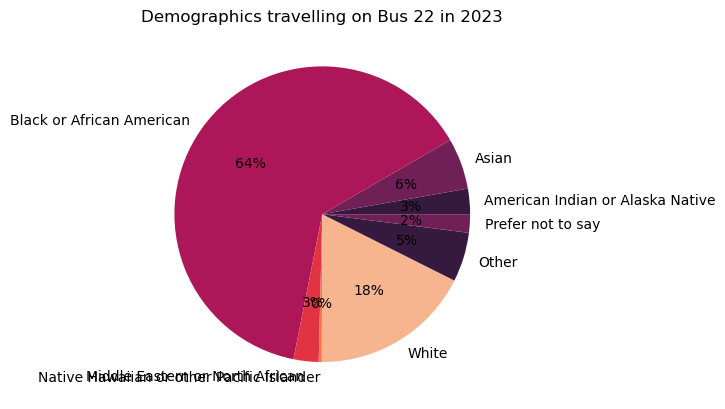

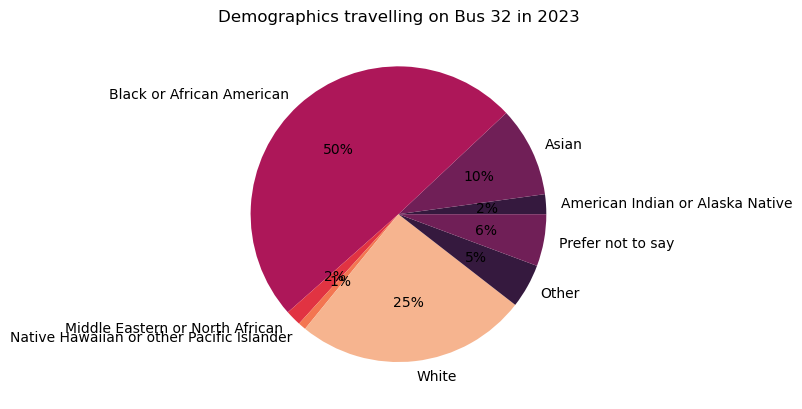

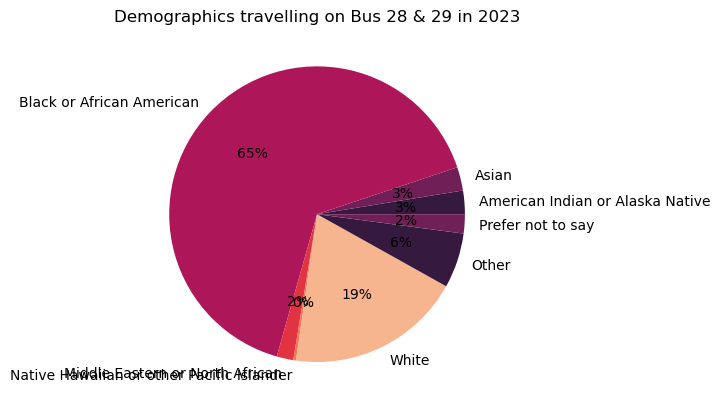

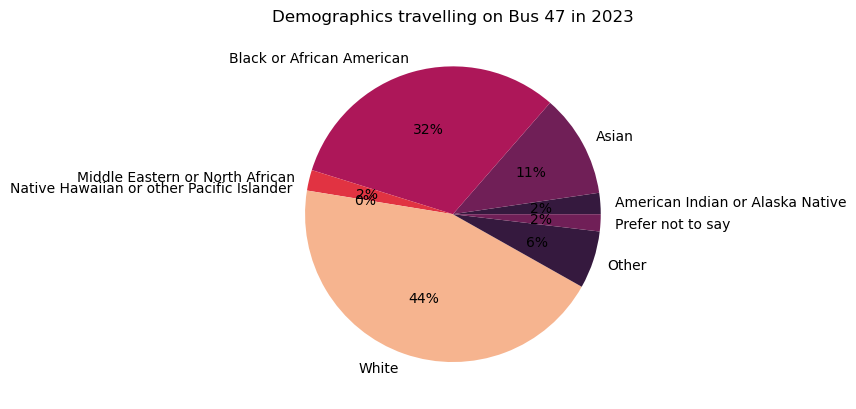

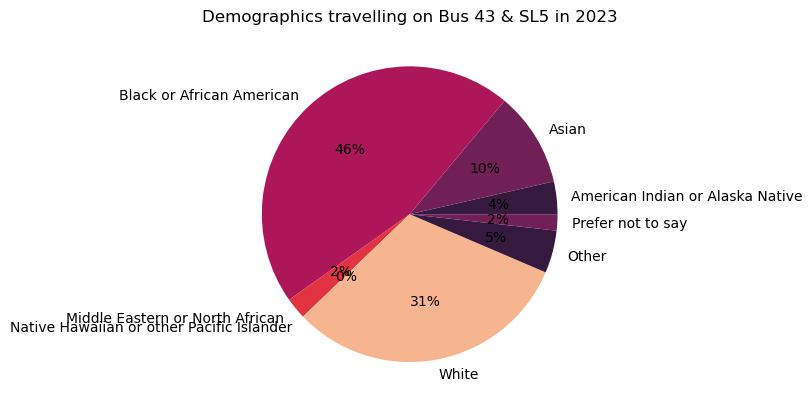

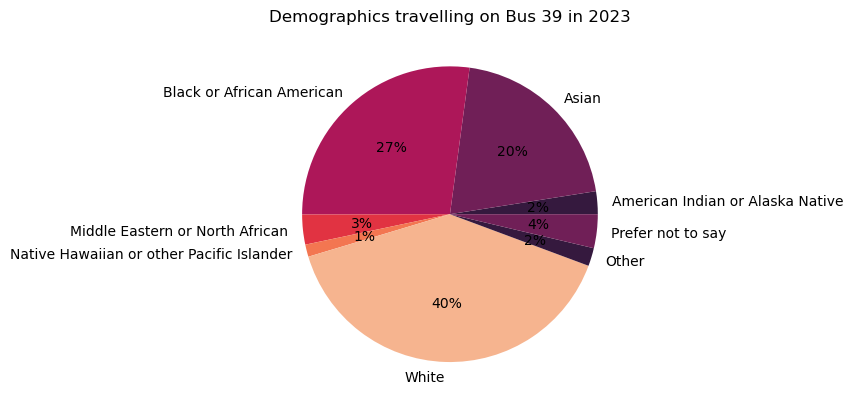

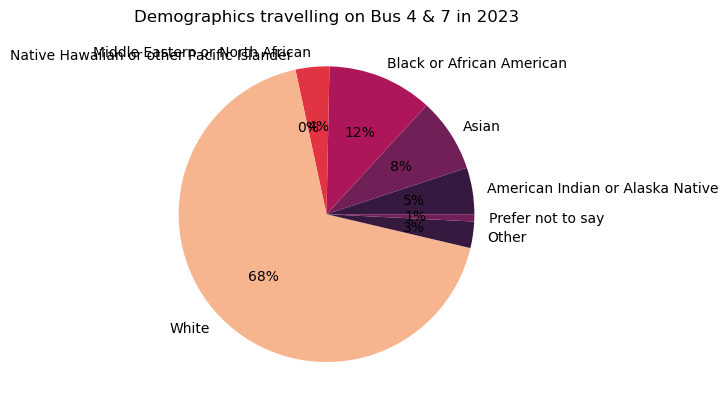

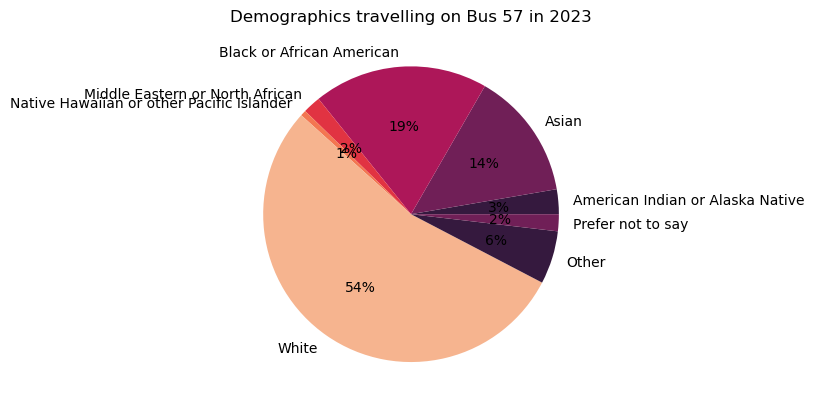

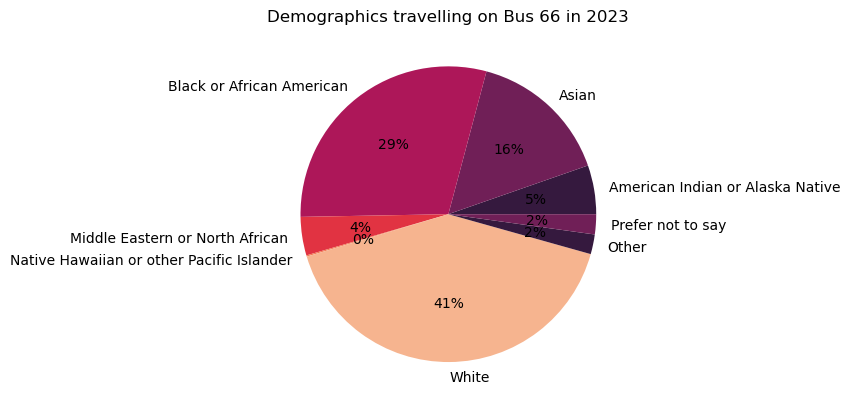

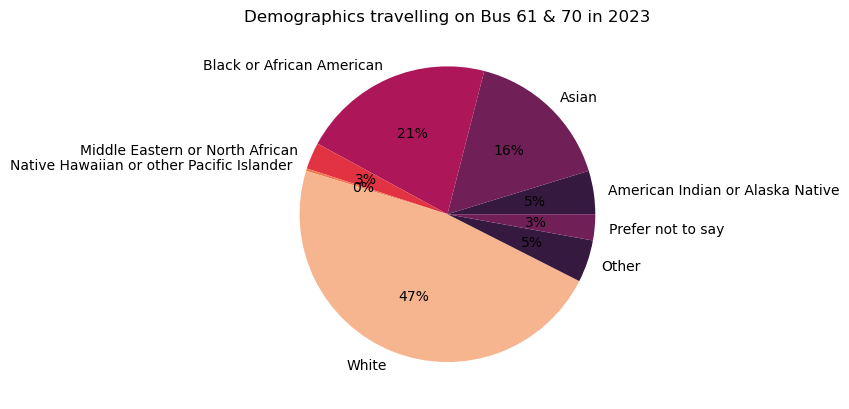

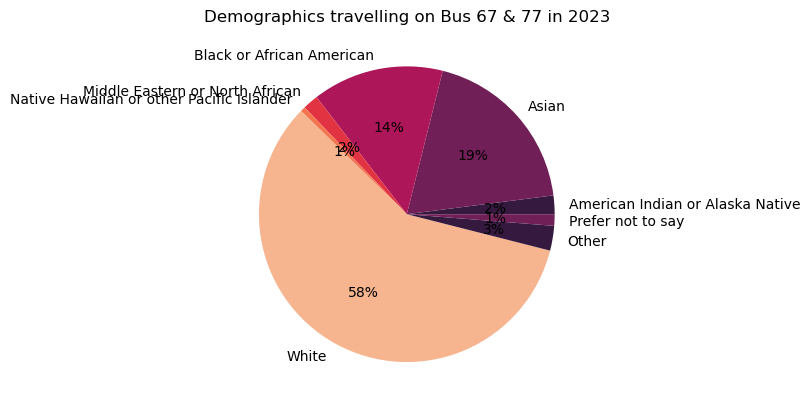

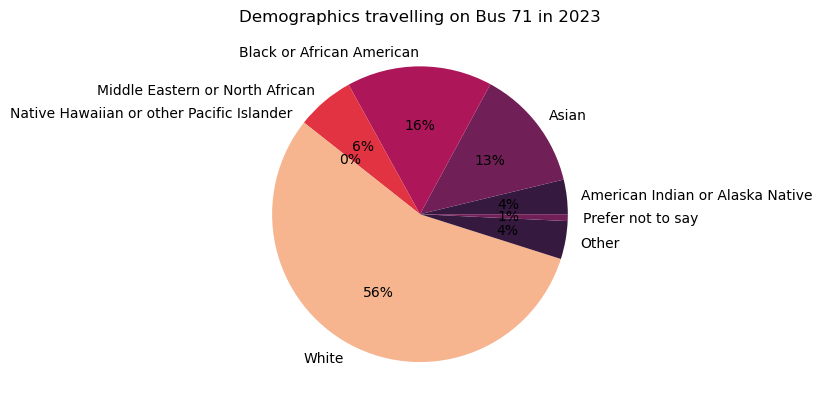

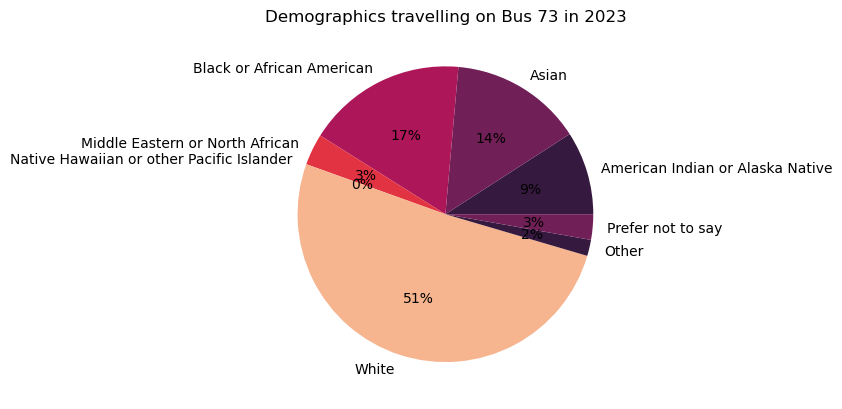

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\BU\\TDS\\DataProject\\survey\\Brighton\\Allston\\Watertown - Boston.png'

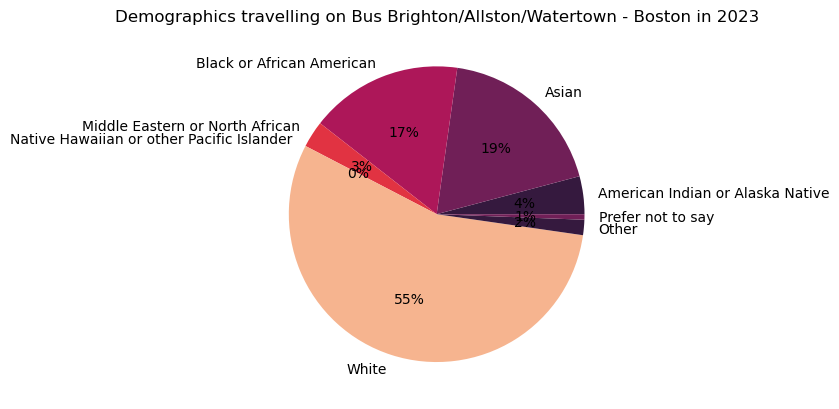

In [72]:
import matplotlib.pyplot as plt
for bus in bus_ids:
    bus_data = data[data['reporting_group'] == bus]
    vals = bus_data['weighted_percent']
    labels = bus_data['category']
    plt.pie(vals, labels=labels, autopct='%.0f%%', colors=sns.color_palette("rocket"))
    plt.title(f"Demographics travelling on Bus {bus} in 2023")
    plt.savefig(f"{bus}.png")
    plt.show()

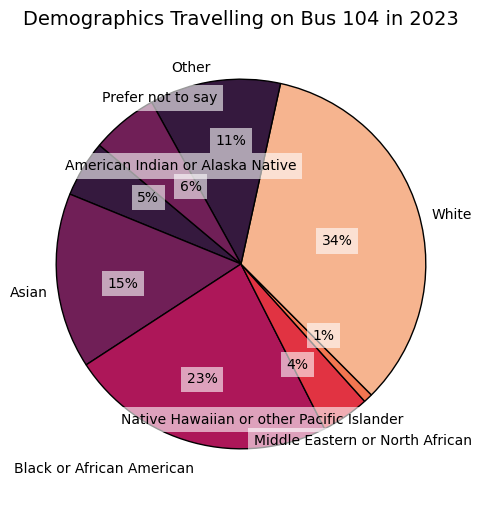

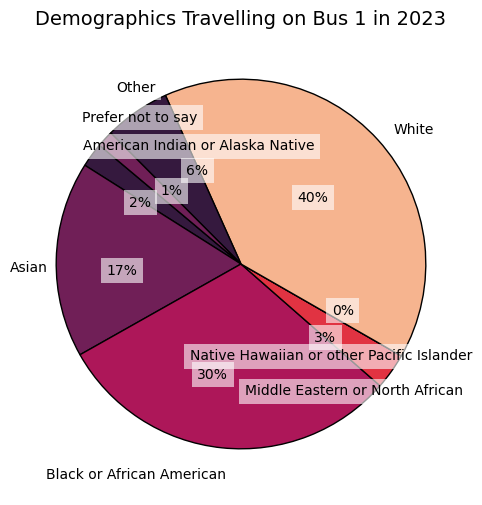

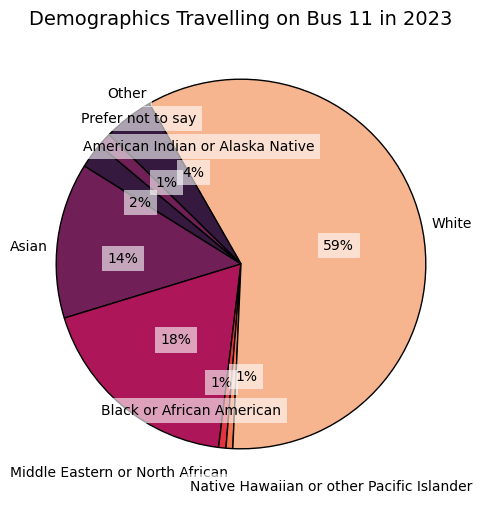

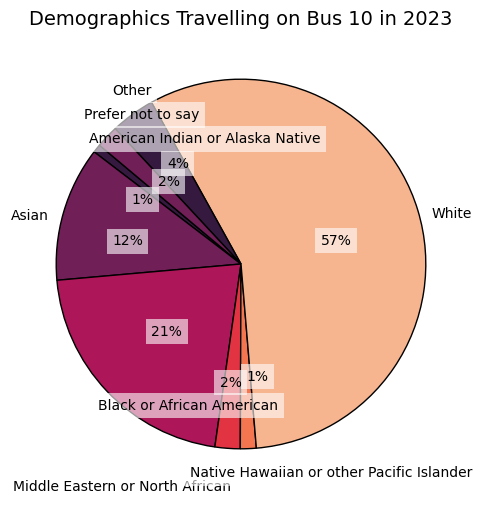

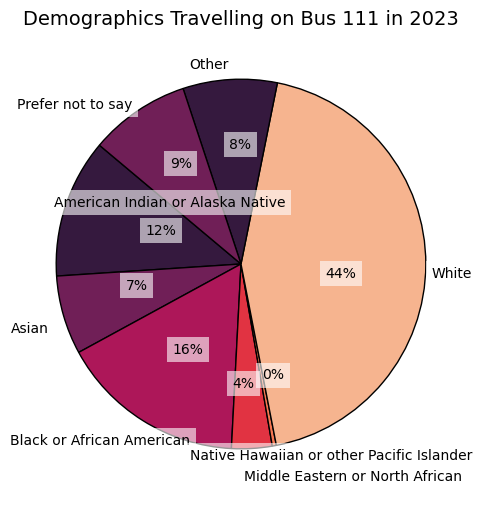

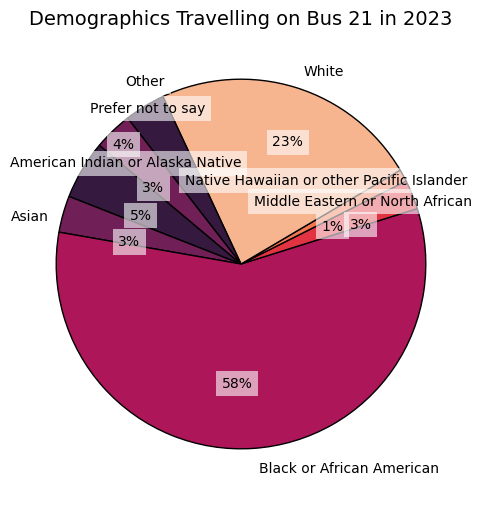

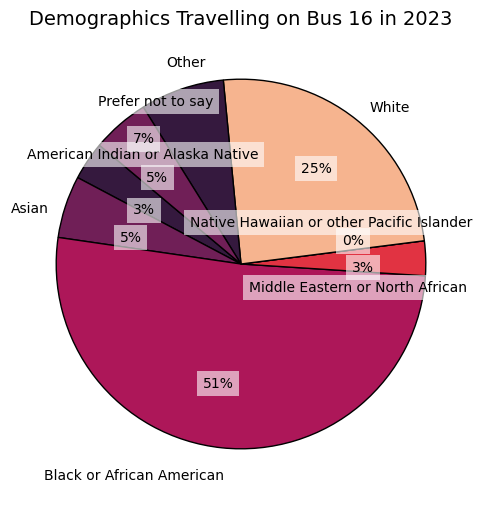

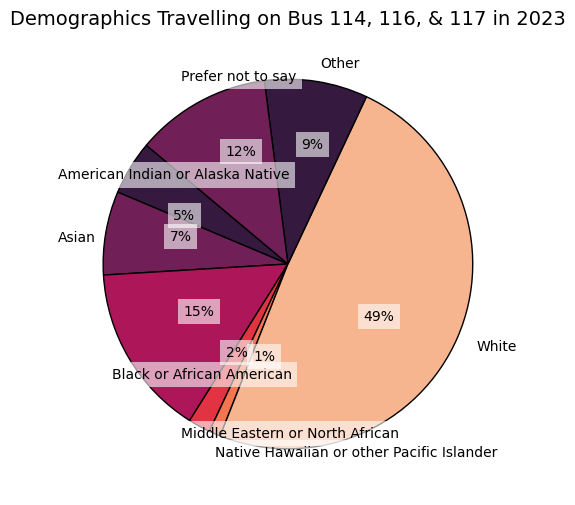

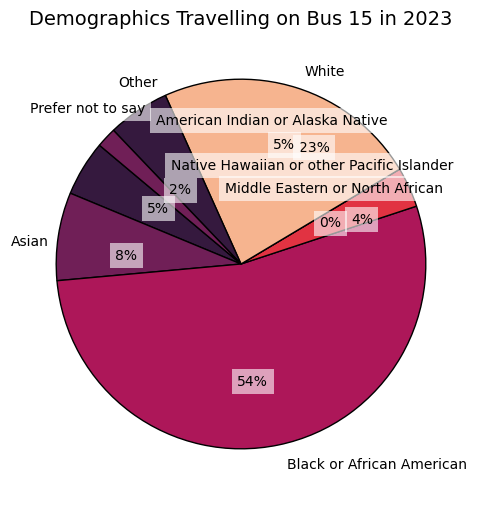

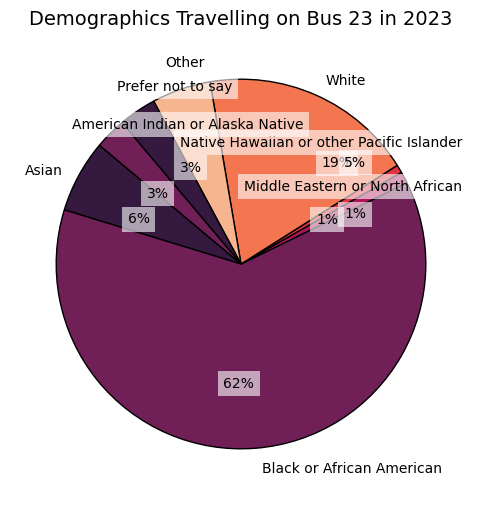

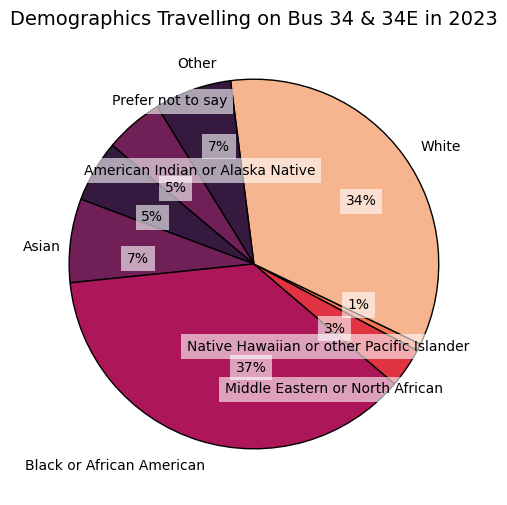

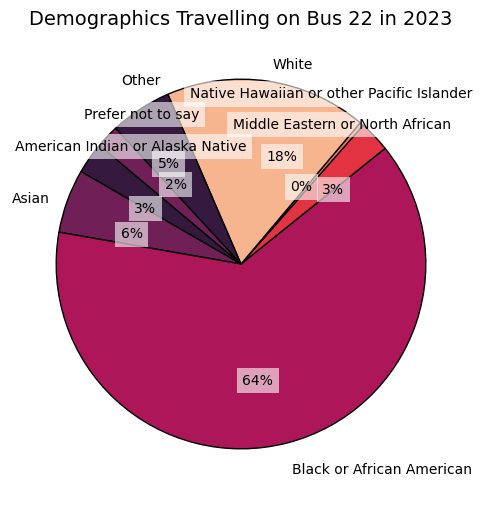

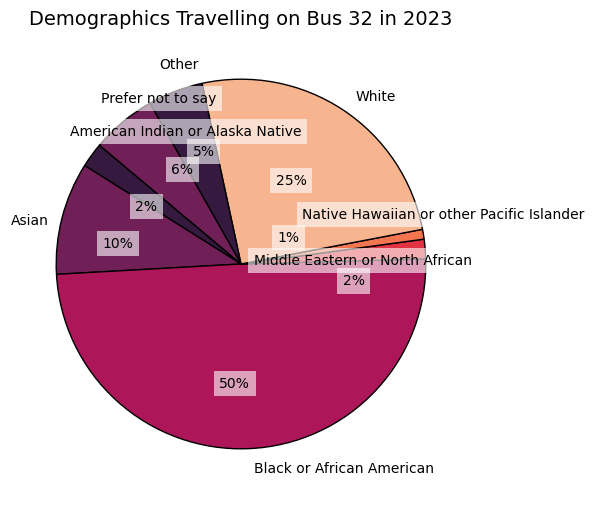

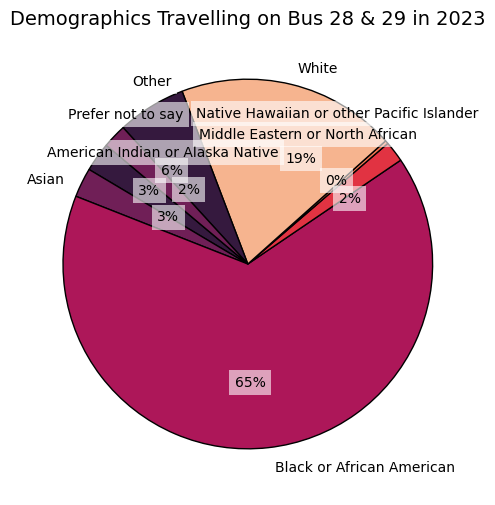

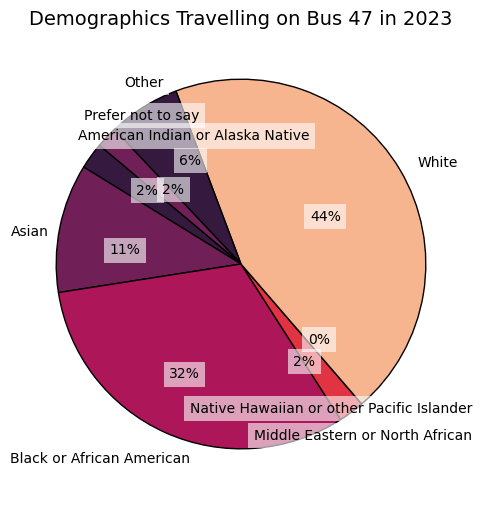

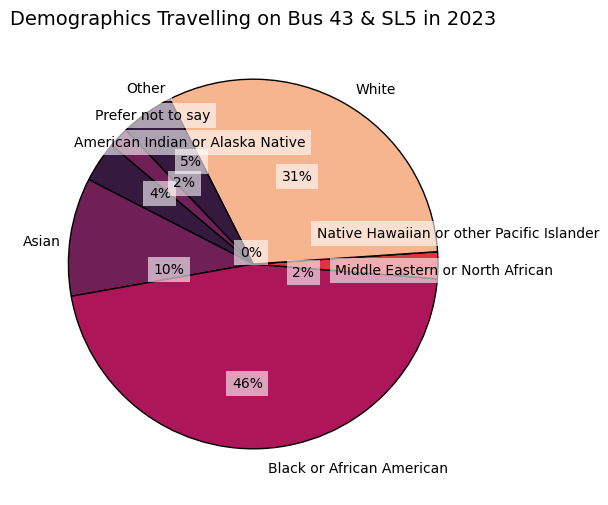

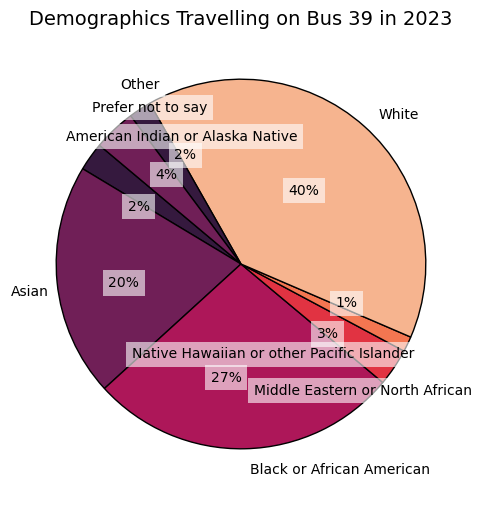

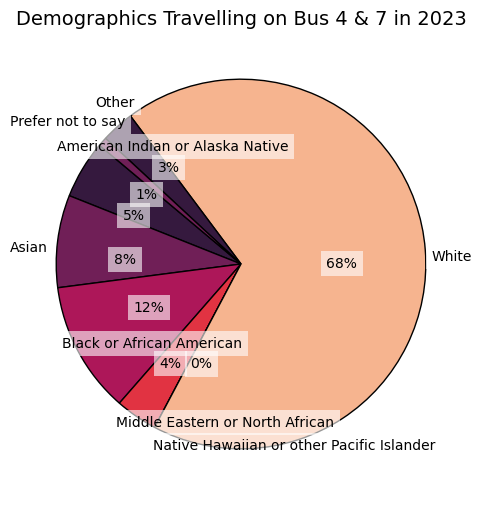

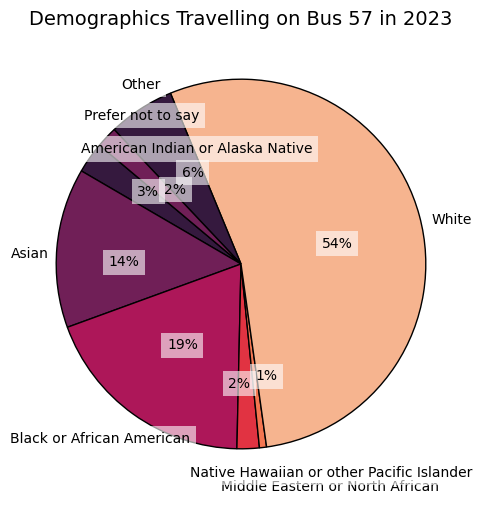

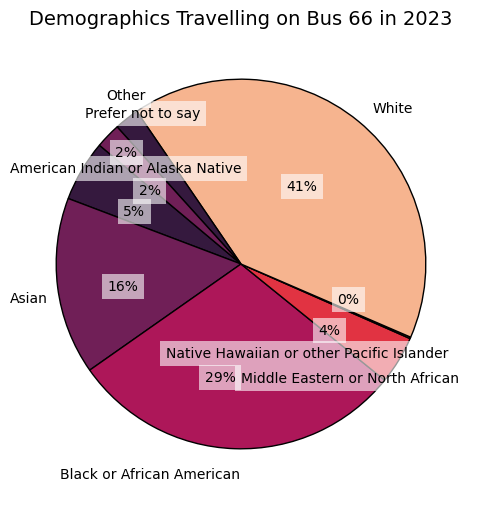

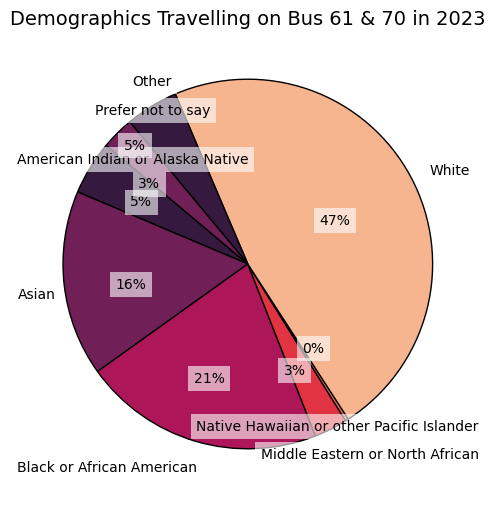

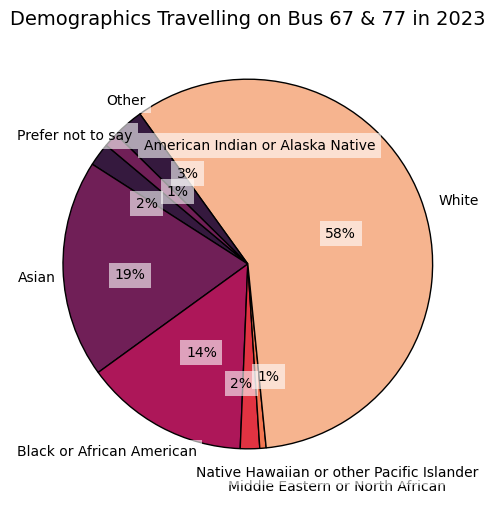

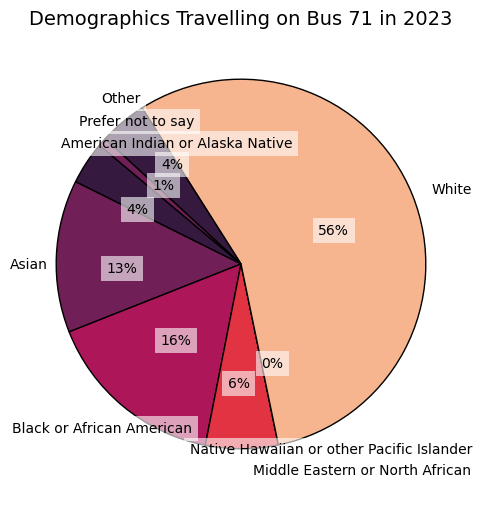

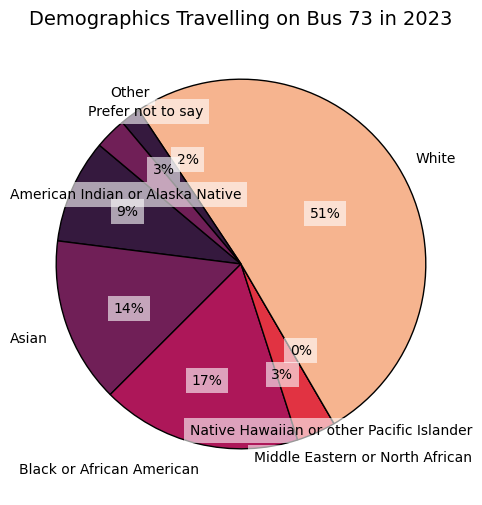

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\BU\\TDS\\DataProject\\survey\\Brighton\\Allston\\Watertown - Boston.png'

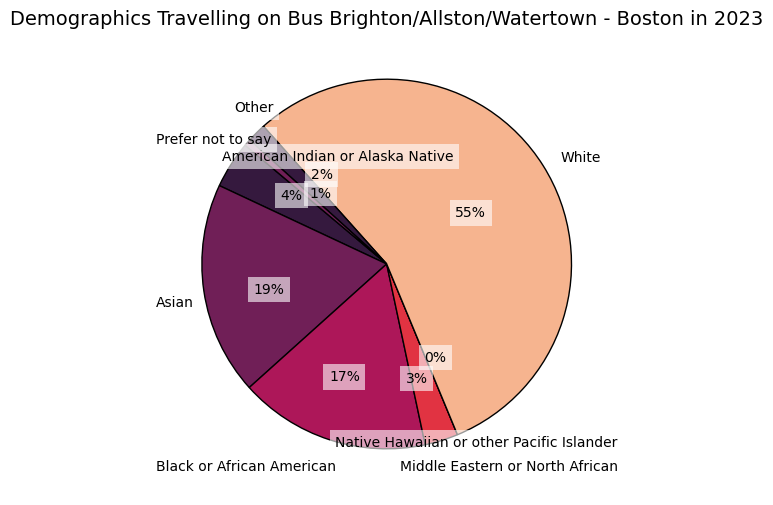

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text  # Helps with label placement

for bus in bus_ids:
    bus_data = data[data['reporting_group'] == bus]
    vals = bus_data['weighted_percent']
    labels = bus_data['category']
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Create the pie chart
    wedges, texts, autotexts = ax.pie(
        vals, labels=labels, autopct='%.0f%%', colors=sns.color_palette("rocket"),
        startangle=140, wedgeprops={'edgecolor': 'black'}
    )

    # Improve label placement
    for text in texts + autotexts:
        text.set_fontsize(10)  # Adjust font size
        text.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='none'))  # Background for visibility

    # Adjust text positions dynamically
    adjust_text(texts + autotexts, expand_text=(1.2, 1.5))

    # Title
    plt.title(f"Demographics Travelling on Bus {bus} in 2023", fontsize=14)

    # Save and show
    plt.savefig(f"{bus}.png", dpi=300, bbox_inches='tight')
    plt.show()